<a href="https://colab.research.google.com/github/tinouirini/Homework/blob/main/dora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
#για wordclouds

In [3]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
#για sentiment analysis

In [4]:
df = pd.read_excel('/content/gdrive/MyDrive/δωρα.xlsx')
# δημιουργία dataframe από το αρχείο των δεδομένων μας

In [5]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)
#για τυχόν duplicates και rows με missing values

In [6]:

print(df.columns)

Index(['type', 'source', 'title', 'text', 'categories', 'sentiment', 'impact',
       'date', 'time', 'link'],
      dtype='object')


In [7]:
df['text'] = df[['title', 'text']].agg(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [8]:

#για συνένωση των στήλων title και text
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df

,type,source,title,text,categories,sentiment,impact,date,time,link,datetime
0,web,gnomip.gr,Ενδοοικογενειακή βία: Διπλάσιες οι καταγγελίες...,Ενδοοικογενειακή βία: Διπλάσιες οι καταγγελίες...,γυναικοκτονίες,Neutral,87.0650,2024-12-24,18:10:37,https://gnomip.gr/2024/12/24/endooikogeneiakh-...,2024-12-24 18:10:37
1,web,bci24news.com,Ενδοοικογενειακή βία: Το 2024 κλείνει με διπλά...,Ενδοοικογενειακή βία: Το 2024 κλείνει με διπλά...,γυναικοκτονίες,Neutral,40.0000,2024-12-24,16:57:37,https://bci24news.com/2024/12/%ce%b5%ce%bd%ce%...,2024-12-24 16:57:37
2,web,athens-news.gr,Ενδοοικογενειακή βία: Το 2024 κλείνει με διπλά...,Ενδοοικογενειακή βία: Το 2024 κλείνει με διπλά...,γυναικοκτονίες,Neutral,40.0000,2024-12-24,16:57:28,https://athens-news.gr/%ce%b5%ce%bd%ce%b4%ce%b...,2024-12-24 16:57:28
3,web,politica.gr,Ενδοοικογενειακή βία: Διπλάσιες οι καταγγελίες...,Ενδοοικογενειακή βία: Διπλάσιες οι καταγγελίες...,γυναικοκτονίες,Neutral,69.6915,2024-12-24,16:16:57,https://www.politica.gr/ellada/endooikogeneiak...,2024-12-24 16:16:57
4,web,koinoniki.gr,Ενδοοικογενειακή βία: Διπλάσιες οι καταγγελίες...,Ενδοοικογενειακή βία: Διπλάσιες οι καταγγελίες...,γυναικοκτονίες,Neutral,67.9010,2024-12-24,16:08:14,https://koinoniki.gr/endooikogeneiaki-via-dipl...,2024-12-24 16:08:14
...,...,...,...,...,...,...,...,...,...,...,...
1358,web,thebest.gr,Αγρίνιο-Γυναικοκτονία: «Τον είχε χωρίσει και ε...,Αγρίνιο-Γυναικοκτονία: «Τον είχε χωρίσει και ε...,γυναικοκτονίες,Neutral,98.8978,2024-11-11,00:00:00,https://www.thebest.gr/article/771231-agrinio-...,2024-11-11 00:00:00
1359,web,sepe.gr,Γυναικοκτονία στο Αγρίνιο: Αυτή είναι η 43χρον...,Γυναικοκτονία στο Αγρίνιο: Αυτή είναι η 43χρον...,γυναικοκτονίες,Negative,60.1700,2024-11-11,00:00:00,https://www.sepe.gr/headlines/22500655/gunaiko...,2024-11-11 00:00:00
1360,web,newspistol.gr,«MEGA STORIES» ΙΣΤΟΡΙΕΣ ΑΛΗΘΙΝΩΝ ΕΓΚΛΗΜΑΤΩΝ ΠΟ...,«MEGA STORIES» ΙΣΤΟΡΙΕΣ ΑΛΗΘΙΝΩΝ ΕΓΚΛΗΜΑΤΩΝ ΠΟ...,γυναικοκτονίες,Positive,74.4420,2024-11-10,00:06:00,https://www.newspistol.gr/article/196192/mega_...,2024-11-10 00:06:00
1361,web,znews.gr,Mega Stories: Αληθινά εγκλήματα που καθηλώνουν...,Mega Stories: Αληθινά εγκλήματα που καθηλώνουν...,γυναικοκτονίες,Positive,97.4048,2024-11-09,19:07:20,https://znews.gr/media/mega-stories-alithina-e...,2024-11-09 19:07:20


In [15]:
# Συνάρτηση για έλεγχο αν η ώρα είναι πλήρης και έγκυρη
def is_valid_time_format(time_str):
    if time_str is None or time_str == '':
        return False
    try:
        pd.to_datetime(time_str, format='%H:%M:%S')
        return True
    except (ValueError, TypeError):
        return False

# Φιλτράρισμα των γραμμών που δεν έχουν έγκυρη ώρα
df = df[df['time'].apply(is_valid_time_format)]

In [16]:
# Συνένωση των στηλών 'date' και 'time' σε μια νέα στήλη 'datetime'
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S')

In [18]:
#Αφού μετατρέψουμε τις ημερομηνίες σε datetime, τώρα μπορούμε να φτιάξουμε στήλες με τα έτη, τους μήνες, τις μέρες κλπ.

df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['day'] = pd.DatetimeIndex(df['datetime']).day
df['hour'] = pd.DatetimeIndex(df['datetime']).hour

In [14]:
#!python -m spacy download el_core_news_sm

In [19]:
# φτιάχνω κατευθείαν και το nlp για να το έχω έτοιμο για τα wordclouds μου και όποια ανάλυση κειμένου θέλω να κάνω
nlp = spacy.load('el_core_news_sm')

In [20]:
file_path = "/content/gdrive/MyDrive/report1/emotions_worlds.xlsx"

In [21]:
# Έλεγχος και δημιουργία του φακέλου αν δεν υπάρχει
import os
folder_path = os.path.dirname(file_path)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Ο φάκελος δημιουργήθηκε επιτυχώς: {folder_path}")
else:
    print(f"Ο φάκελος υπάρχει ήδη: {folder_path}")

Ο φάκελος υπάρχει ήδη: /content/gdrive/MyDrive/report1


In [22]:
#δημιουργώ ένα df που να περιλαμβάνει μόνο τις στήλες: date, section, author και text για καποίες αναλύσεις
selected_cols_df = df[["datetime","text"]]

In [23]:
selected_cols_df.tail(1)

,datetime,text
1362,2024-10-29 11:53:01,"Η Μαρία, το κορίτσι από τη Ρόδο, νίκησε τον κα..."


<Axes: xlabel='month'>

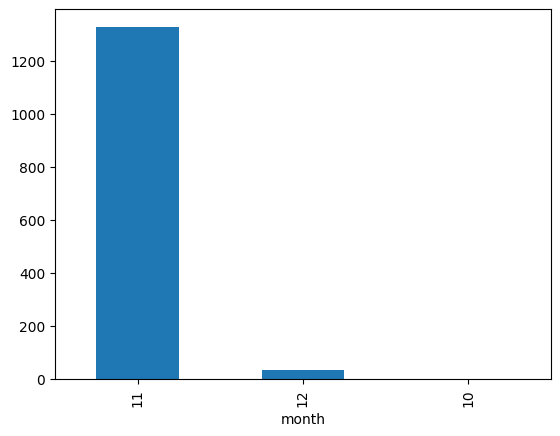

In [24]:
df['month'].value_counts().plot(kind='bar')

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [26]:
# afairoume tonous
text = df['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [27]:
#ενώνω τα κείμενα
text = df['text'].str.cat(sep = ' ')

In [28]:
extra_stopwords = {
    # Θέμα: Γυναικοκτονίες
    "gynaikoktonia", "γυναικοκτονία", "γυναικοκτονια", "γυναικοκτόνος", "γυναικοκτονίας",
    "δολοφονία", "δολοφόνος", "δολοφονήθηκε", "δολοφονήσουν", "δολοφονίας", "δολοφόνοι",
    "δολοφονεί", "δολοφονείτο", "δολοφονησε", "δολοφονημένη", "ανθρωποκτονία", "δολοφονικό",
    "φόνου", "έγκλημα", "έγκληματος", "εγκληματίας", "εγκληματική", "εγκληματικότητας",
    "θύμα", "θύματα", "νεκρή", "νεκρός", "έπεσε νεκρή", "κακοποίηση", "βία",
    "ενδοοικογενειακή βία", "μαχαίρωσε", "πυροβόλησε", "πνιγμός", "χτύπησε",
    "τραγωδία", "τραγικό", "κατηγορούμενος", "σύζυγος", "σχέση", "σχέσης", "Κυριακής",
    "ερωτική", "χωρισμός", "ζήλια",


    # Κλασικά ελληνικά stopwords (συχνότατες λέξεις χωρίς νόημα για ανάλυση)
    "και", "ή", "ούτε", "αλλά", "να", "που", "πως", "ότι", "επίσης", "κτλ",
    "δηλαδή", "λοιπόν", "δηλαδη", "δηλ", "όμως", "καθώς", "επειδή", "διότι",
    "για", "με", "χωρίς", "κατά", "παρά", "ως", "ενώ", "πριν", "αφού",
    "εάν", "αν", "έχει", "έχουν", "οπου", "δυο", "πολύ", "λίγο",
    "εδώ", "εκεί", "πάνω", "κάτω", "πάλι", "όταν", "όπου", "τότε", "τώρα" , "είτε" , "είπε"
}
# Προσθήκη των extra_stopwords στις default stop words του spaCy
all_stopwords = set(nlp.Defaults.stop_words).union(extra_stopwords)

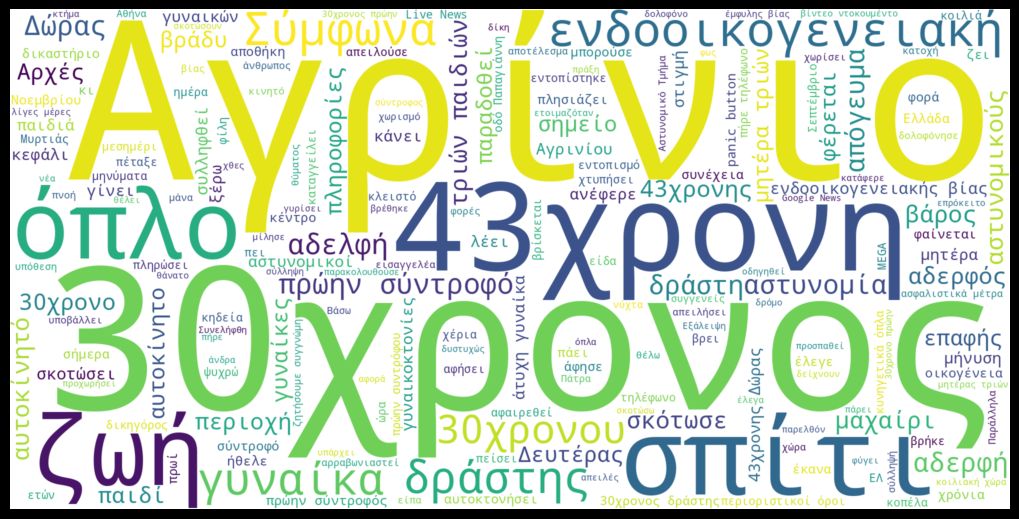

In [27]:
wordcloud = WordCloud(
    stopwords =all_stopwords,
    width = 2000,
    height = 1000,
    background_color = 'white'
  ).generate(text)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [29]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [30]:
mask = np.array(Image.open("/content/gdrive/MyDrive/istockphoto-178517041-612x612.jpg"))

In [31]:
wordcloud = WordCloud(stopwords=all_stopwords, background_color='white', mode='RGBA', max_words=5000, mask=mask).generate(text)

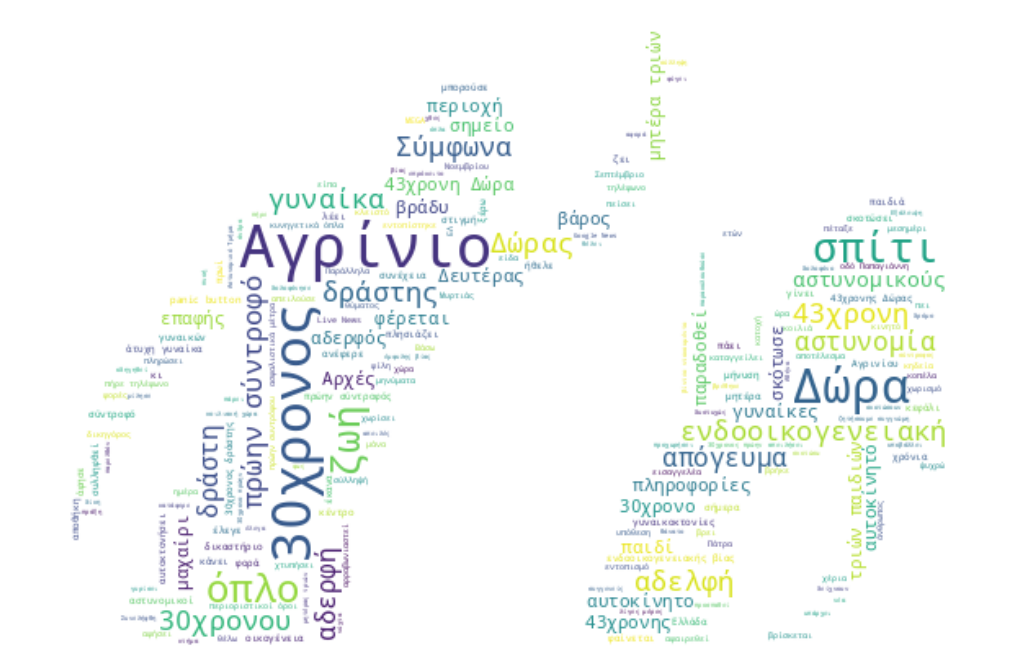

In [32]:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)



<Axes: ylabel='type'>

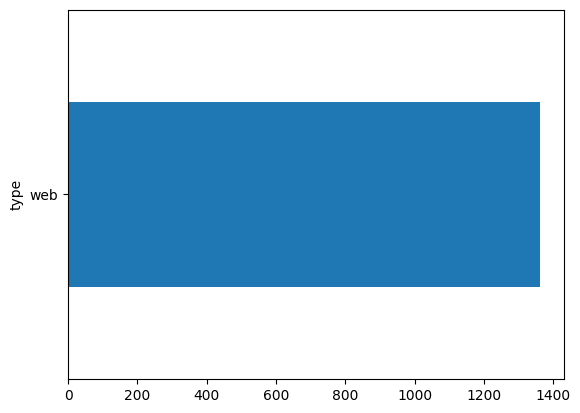

In [33]:
df['type'].value_counts().sort_values(ascending=True).plot(kind='barh')

In [34]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
articles_per_day = df.groupby(df['date'].dt.strftime('%Y-%m-%d')).size().reset_index(name='count')


dates_with_more_than_100_articles = articles_per_day[articles_per_day['count'] > 100]['date']


print(dates_with_more_than_100_articles)

4    2024-11-12
5    2024-11-13
6    2024-11-14
Name: date, dtype: object


In [47]:
# Καθορισμός φάσεων με φίλτρα
phase1 = df[(df['date'] >= '2024-10-27') & (df['date'] <= '2024-11-10')]  # Awareness
phase2 = df[(df['date'] >= '2024-11-11') & (df['date'] <= '2024-11-25')]  # Peak
phase3 = df[(df['date'] >= '2024-11-26') & (df['date'] <= '2024-12-24')]  # Decline

# Καταμέτρηση άρθρων
count1 = phase1.shape[0]
count2 = phase2.shape[0]
count3 = phase3.shape[0]

# Εκτύπωση αποτελεσμάτων
print("Άρθρα ανά φάση της Κυκλοειδούς Προσοχής του Downs:")
print(f"1η Φάση (27 Οκτωβρίου–10 Νοεμβρίου 2024 - Awareness): {count1} άρθρα")
print(f"2η Φάση (11–25  Νοεμβρίου 2024 - Peak): {count2} άρθρα")
print(f"3η Φάση (26 Νοεμβρίου – 24 Δεκεμβρίου 2024 - Decline): {count3} άρθρα")

Άρθρα ανά φάση της Κυκλοειδούς Προσοχής του Downs:
1η Φάση (27 Οκτωβρίου–10 Νοεμβρίου 2024 - Awareness): 3 άρθρα
2η Φάση (11–25  Νοεμβρίου 2024 - Peak): 1305 άρθρα
3η Φάση (26 Νοεμβρίου – 24 Δεκεμβρίου 2024 - Decline): 55 άρθρα


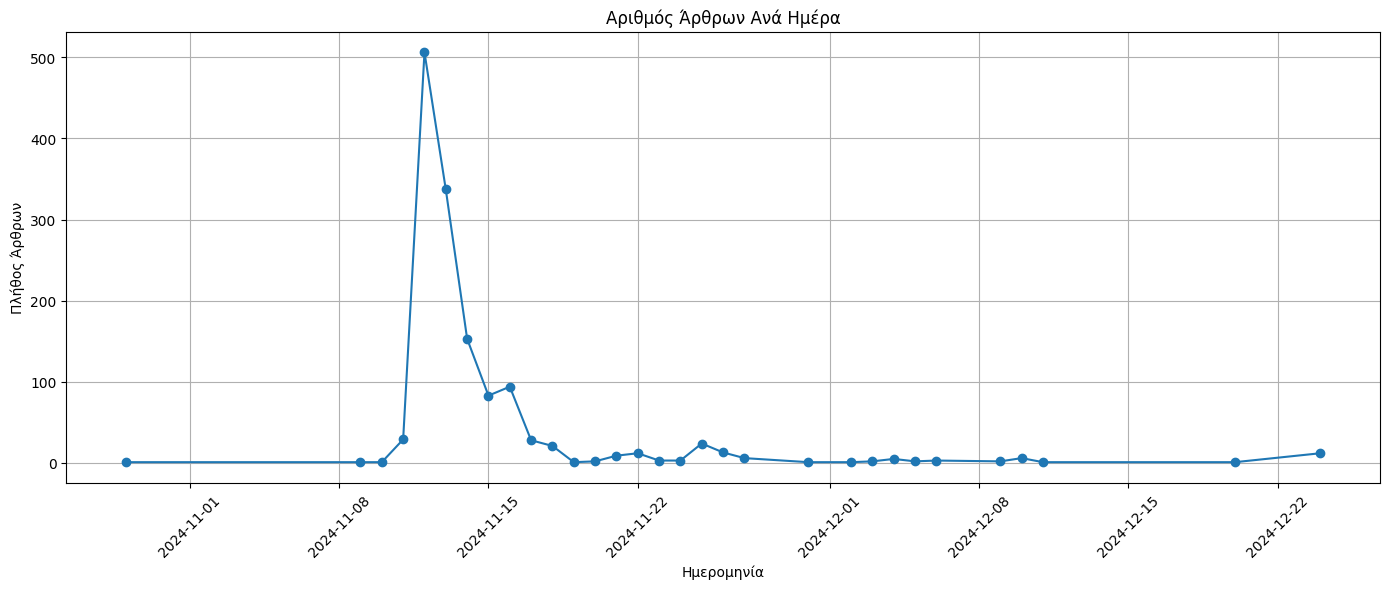

In [48]:
# Ομαδοποίηση άρθρων ανά ημέρα
articles_per_day = df.groupby('date').size().reset_index(name='count')

# Δημιουργία γραμμικού διαγράμματος
plt.figure(figsize=(14, 6))
plt.plot(articles_per_day['date'], articles_per_day['count'], marker='o', linestyle='-')

# Τίτλος και άξονες
plt.title('Αριθμός Άρθρων Ανά Ημέρα')
plt.xlabel('Ημερομηνία')
plt.ylabel('Πλήθος Άρθρων')
plt.grid(True)
plt.xticks(rotation=45)

# Εμφάνιση διαγράμματος
plt.tight_layout()
plt.show()

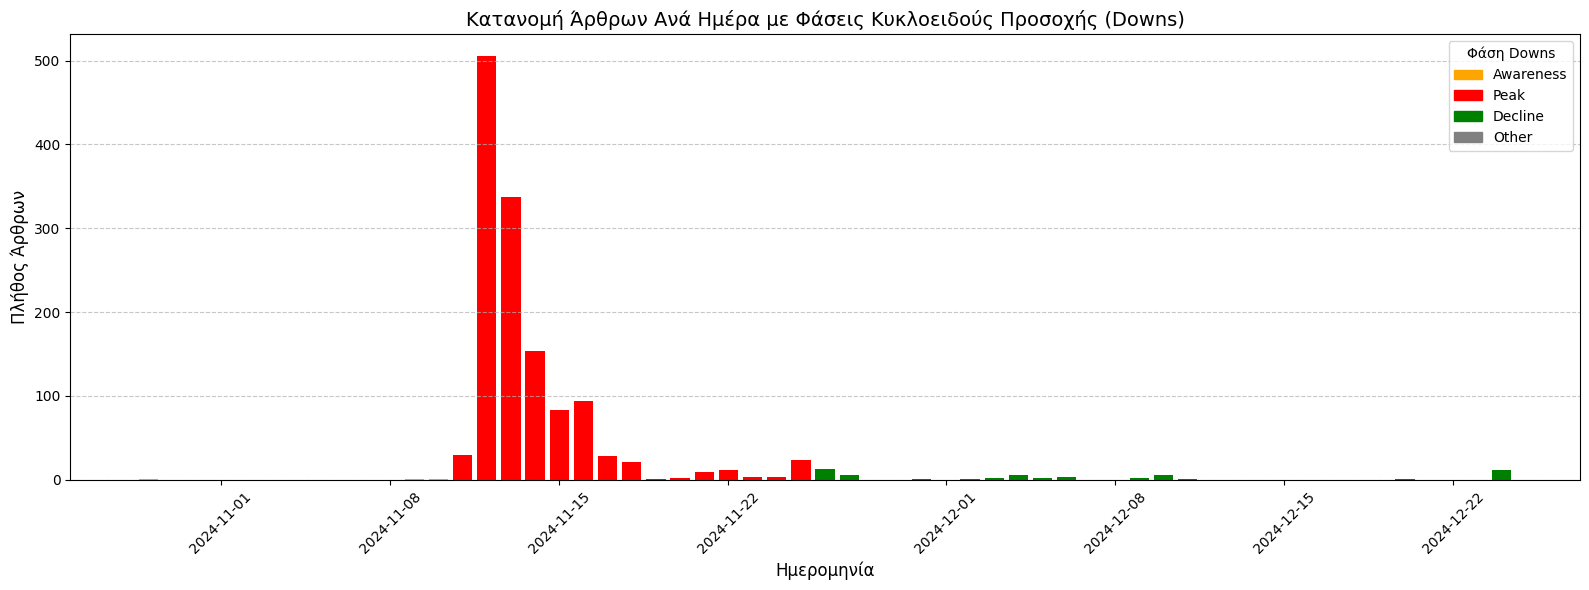

In [50]:
# Ορισμός χρωμάτων ανά φάση Downs
def classify_phase(date):
    if pd.Timestamp('2024-10-27') <= date <= pd.Timestamp('2024-11-10'):
        return 'Awareness'
    elif pd.Timestamp('2024-11-11') <= date <= pd.Timestamp('2024-11-25'):
        return 'Peak'
    elif pd.Timestamp('2024-11-26') <= date <= pd.Timestamp('2024-12-24'):
        return 'Decline'
    else:
        return 'Other'

# Δημιουργία νέας στήλης "phase"
articles_per_day['phase'] = articles_per_day['date'].apply(classify_phase)

# Χρώματα για κάθε φάση
color_map = {
    'Awareness': 'orange',
    'Peak': 'red',
    'Decline': 'green',
    'Other': 'gray'
}
colors = articles_per_day['phase'].map(color_map)

# Διάγραμμα
plt.figure(figsize=(16, 6))
bars = plt.bar(articles_per_day['date'], articles_per_day['count'], color=colors)

plt.title('Κατανομή Άρθρων Ανά Ημέρα με Φάσεις Κυκλοειδούς Προσοχής (Downs)', fontsize=14)
plt.xlabel('Ημερομηνία', fontsize=12)
plt.ylabel('Πλήθος Άρθρων', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Προσθήκη λεζάντας
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in color_map.items()]
plt.legend(handles=legend_patches, title="Φάση Downs")

plt.tight_layout()
plt.show()

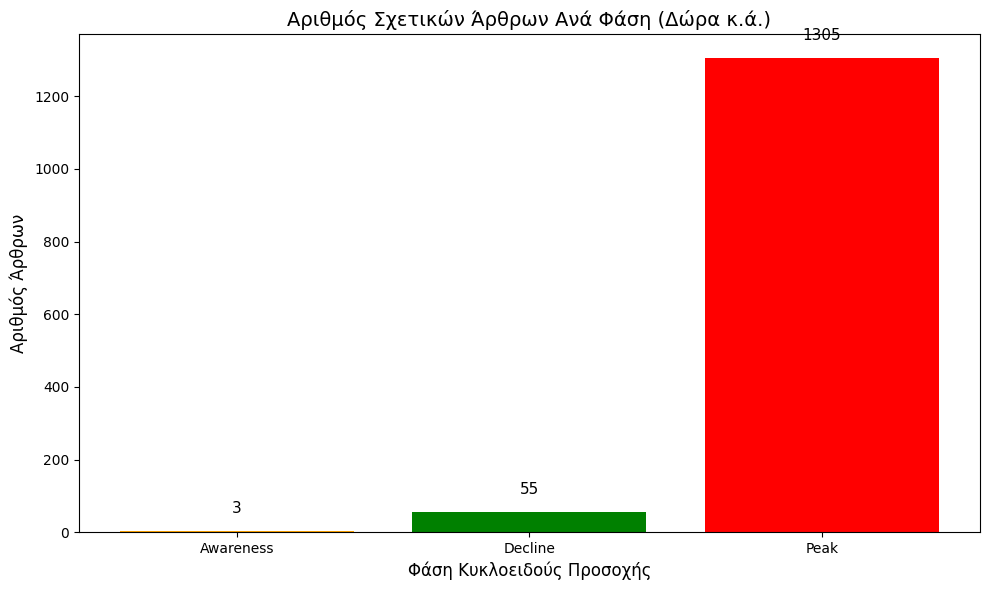

In [53]:
# Κάνω lowercase το text και το title για ευκολία
df['text'] = df['text'].astype(str).str.lower()
df['title'] = df['title'].astype(str).str.lower()

# Ορίζω τα keywords που θες να ψάξεις
keywords = [ "Δώρα", "Δωρα","δώρα","δωρα","Αγρίνιο","αγρίνιο","Αγρινιο","Αγρίνιο"

]

# Δημιουργω το pattern για αναζήτηση
import re
pattern = '|'.join(re.escape(k) for k in keywords)

# Φιλτράρω τα άρθρα που περιέχουν τα keywords
filtered_df = df[
    df['text'].str.contains(pattern, regex=True) | df['title'].str.contains(pattern, regex=True)
]

# Ορίζω φάσεις Downs

def classify_phase(date):
    if pd.Timestamp('2024-10-27') <= date <= pd.Timestamp('2024-11-10'):
        return 'Awareness'
    elif pd.Timestamp('2024-11-11') <= date <= pd.Timestamp('2024-11-25'):
        return 'Peak'
    elif pd.Timestamp('2024-11-26') <= date <= pd.Timestamp('2024-12-24'):
        return 'Decline'
    else:
        return 'Other'

# Εφαρμόζω τη φάση σε κάθε άρθρο
filtered_df['phase'] = filtered_df['date'].apply(classify_phase)

# Μετράω άρθρα ανά φάση
phase_counts = filtered_df['phase'].value_counts().sort_index()

# Ορίζω τα χρώματα για κάθε φάση
colors = {
    'Awareness': 'orange',
    'Peak': 'red',
    'Decline': 'green',
    'Other': 'gray'
}

# γράφημα
plt.figure(figsize=(10, 6))
bar_colors = [colors.get(phase, 'gray') for phase in phase_counts.index]
bars = plt.bar(phase_counts.index, phase_counts.values, color=bar_colors)


plt.title("Αριθμός Σχετικών Άρθρων Ανά Φάση (Δώρα κ.ά.)", fontsize=14)
plt.xlabel("Φάση Κυκλοειδούς Προσοχής", fontsize=12)
plt.ylabel("Αριθμός Άρθρων", fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, str(height), ha='center', fontsize=11)

plt.tight_layout()
plt.show()

In [54]:
print(filtered_df['phase'].value_counts().sort_index())

phase
Awareness       3
Decline        55
Peak         1305
Name: count, dtype: int64
